## EN3160 Assignment 01
#### Intensity Transformations and Neighborhood Filtering

In [1]:
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

##### Question 01

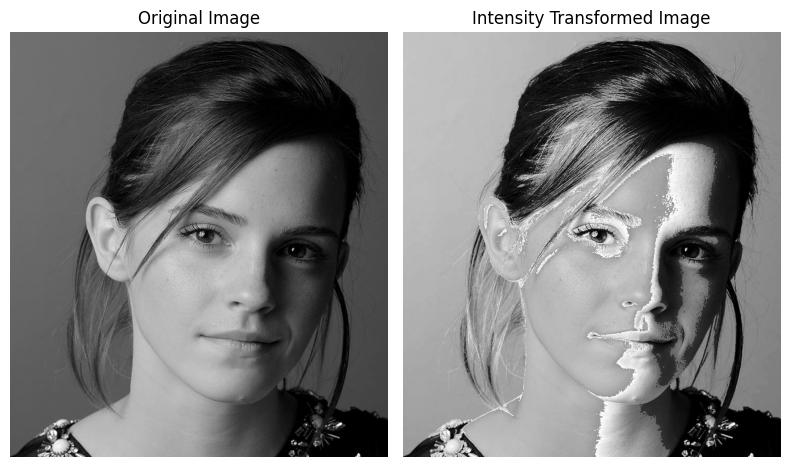

In [ ]:
# Load the required image in grayscale
img = cv2.imread("a1images/emma.jpg", cv2.IMREAD_GRAYSCALE)

# Construct a vector representing the transformation
T = np.arange(256, dtype=np.uint8)
T[50:151] = 1.55 * T[50:151] + 22.5

# Apply the transformation to the image
img_t = T[img]

# Display the images
fig, ax = plt.subplots(1, 2, figsize = (8, 8))
for a in ax:
    a.axis('off')

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Intensity Transformed Image")
ax[1].imshow(img_t, cmap='gray', vmin=0, vmax=255)

plt.tight_layout()
plt.show()

##### Question 02

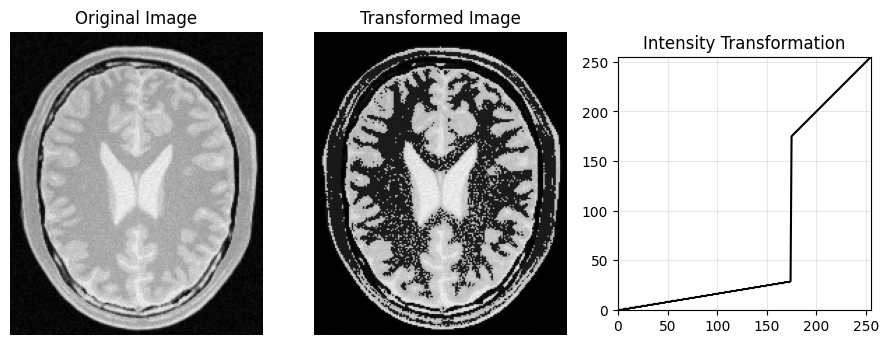

In [123]:
# Load the required image in grayscale
img = cv2.imread("a1images/brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Create a vector to represent the transformation
T = np.arange(256, dtype=np.uint8)
T[0:175] = T[0:175] // 6

# Apply the transformation to the image
t_img = T[img]

# Display the images and intensity transformation used
fig, ax = plt.subplots(1, 3, figsize=(9, 8))
for i in range(2):
    # We will leave the axes of the last subplot in place as it displays a transformation
    ax[i].axis('off')

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Transformed Image")
ax[1].imshow(t_img, cmap='gray', vmin=0, vmax=255)

ax[2].set_title("Intensity Transformation")
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_xticks(np.arange(0, 256, 50))
ax[2].set_yticks(np.arange(0, 256, 50))
ax[2].grid(True, alpha=0.3)
ax[2].set_aspect('equal')
ax[2].plot(T, color='black')

plt.tight_layout()
plt.show()

##### Question 03

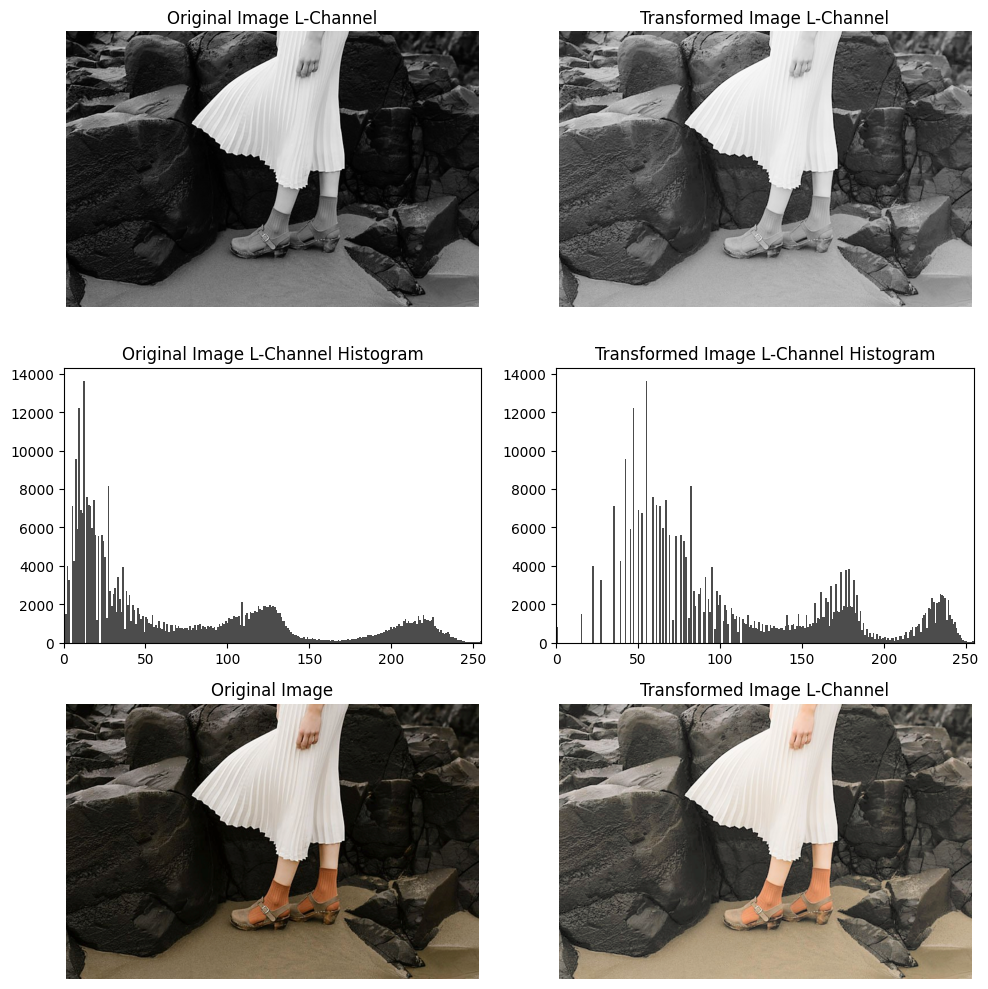

In [144]:
# Open the required image and convert the color space to LAB
img = cv2.imread("a1images/highlights_and_shadows.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

# Extract the L plane
img_l = img[:, :, 0]

# Set the value of gamma for the transformation
gamma = 0.5

# Construct a vector representing the intensity transformation
T = np.arange(0, 256, dtype=np.uint8) / 255.0
T = (T ** gamma) * 255

# Apply the transformation to the L plane
img_t = T[img_l].astype(np.uint8)

# Set up the plots, display the images and histograms
fig, ax = plt.subplots(3, 2, figsize=(10, 10))

ax[0][0].set_title("Original Image L-Channel")
ax[0][0].axis('off')
ax[0][0].imshow(img_l, cmap='gray')

ax[0][1].set_title("Transformed Image L-Channel")
ax[0][1].axis('off')
ax[0][1].imshow(img_t, cmap='gray')

ax[1][0].set_title("Original Image L-Channel Histogram")
ax[1][0].set_xlim(0, 255)
ax[1][0].hist(img_l.ravel(), bins=256, color='black', alpha=0.7)

ax[1][1].set_title("Transformed Image L-Channel Histogram")
ax[1][1].set_xlim(0, 255)
ax[1][1].hist(img_t.ravel(), bins=256, color='black', alpha=0.7)

ax[2][0].set_title("Original Image")
ax[2][0].axis('off')
ax[2][0].imshow(cv2.cvtColor(img, cv2.COLOR_LAB2RGB))

ax[2][1].set_title("Transformed Image L-Channel")
ax[2][1].axis('off')
ax[2][1].imshow(cv2.cvtColor(cv2.merge([img_t, img[:, :, 1], img[:, :, 2]]), cv2.COLOR_LAB2RGB))

plt.tight_layout()
plt.show()

##### Question 04

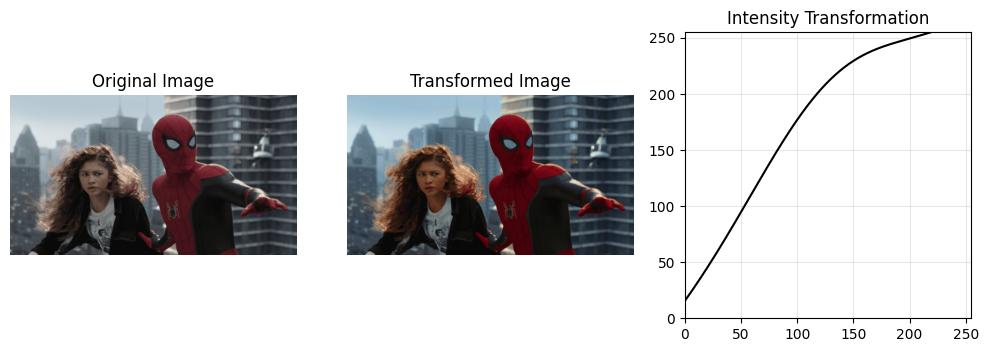

In [152]:
# Start by opening te required image
img = cv2.imread("a1images/spider.png")

# Split the image into H, S, V channels
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
H = img[:, :, 0]
S = img[:, :, 1]
V = img[:, :, 2]

# Construct a vector to represent the given intensity transformation
a = 0.65
sigma = 70

T = np.arange(256, dtype=np.float32)
T = np.minimum(np.ones(256) * 255, T + a * 128 * np.exp(-((T - 128) ** 2) / (2 * sigma ** 2)))

# Apply the transformation to the S channel of the image
S_new = T[S]

# Construct a new image by replacing the S channel in a copy of the original image with the transformed S channel
img_t = img.copy()
img_t[:, :, 1] = S_new
img_t = cv2.cvtColor(img_t, cv2.COLOR_HSV2RGB)

# Display the images and the intensity transformation
fig, ax = plt.subplots(1, 3, figsize=(10, 8))
for i in range(2):
    ax[i].axis('off')   

ax[0].set_title("Original Image")
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))

ax[1].set_title("Transformed Image")
ax[1].imshow(img_t)

ax[2].plot(T, color='black')
ax[2].set_xlim(0, 255)
ax[2].set_ylim(0, 255)
ax[2].set_xticks(np.arange(0, 256, 50))
ax[2].set_yticks(np.arange(0, 256, 50))
ax[2].grid(True, alpha=0.3)
ax[2].set_aspect('equal')
ax[2].set_title("Intensity Transformation")

plt.tight_layout()
plt.show()

##### Question 05

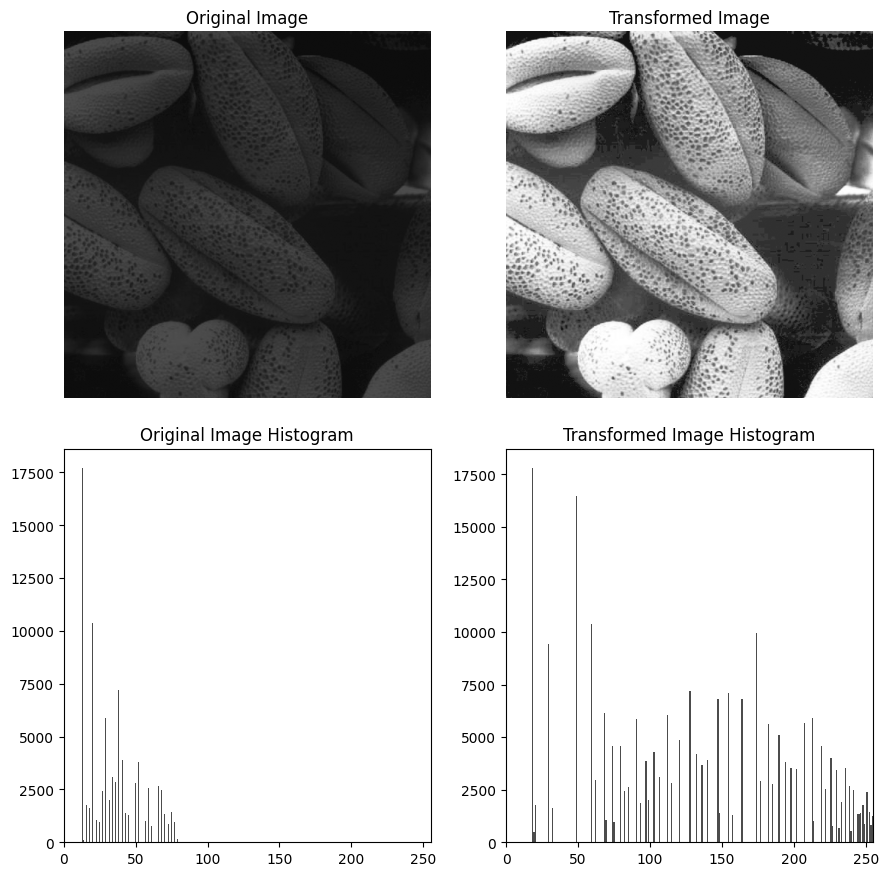

In [160]:
def equalize_histogram(img):
    # Obtain the distinct pixel values, their counts, and a cumulating sum of their counts
    pixel_values, counts = np.unique(img, return_counts=True)
    cumulative_counts = np.cumsum(counts)

    # Construct a vector to represent the transformation
    T = np.arange(256, dtype=np.uint8)

    # The transformed value of a pixel with value x is
    #   255 * probability of finding a pixel with value less than x
    for i in range(len(pixel_values)):
        pixel_value = pixel_values[i]
        T[pixel_value] = np.round((cumulative_counts[i] / cumulative_counts[-1]) * 255)

    # Apply the transformation and return a new image
    return T[img]

# Open the required image
img = cv2.imread("a1images/shells.tif", cv2.IMREAD_GRAYSCALE)

# Equalize the histogram of the image
t_img = equalize_histogram(img)

# Display the images and their histograms
fig, ax = plt.subplots(2, 2, figsize=(9, 9))

ax[0][0].set_title("Original Image")
ax[0][0].axis('off')
ax[0][0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[0][1].set_title("Transformed Image")
ax[0][1].axis('off')
ax[0][1].imshow(t_img, cmap='gray', vmin=0, vmax=255)

ax[1][0].set_title("Original Image Histogram")
ax[1][0].set_xlim(0, 255)
ax[1][0].hist(img.ravel(), bins=256, color='black', alpha=0.7)

ax[1][1].set_title("Transformed Image Histogram")
ax[1][1].set_xlim(0, 255)
ax[1][1].hist(t_img.ravel(), bins=256, color='black', alpha=0.7)

plt.tight_layout()
plt.show()

##### Question 06

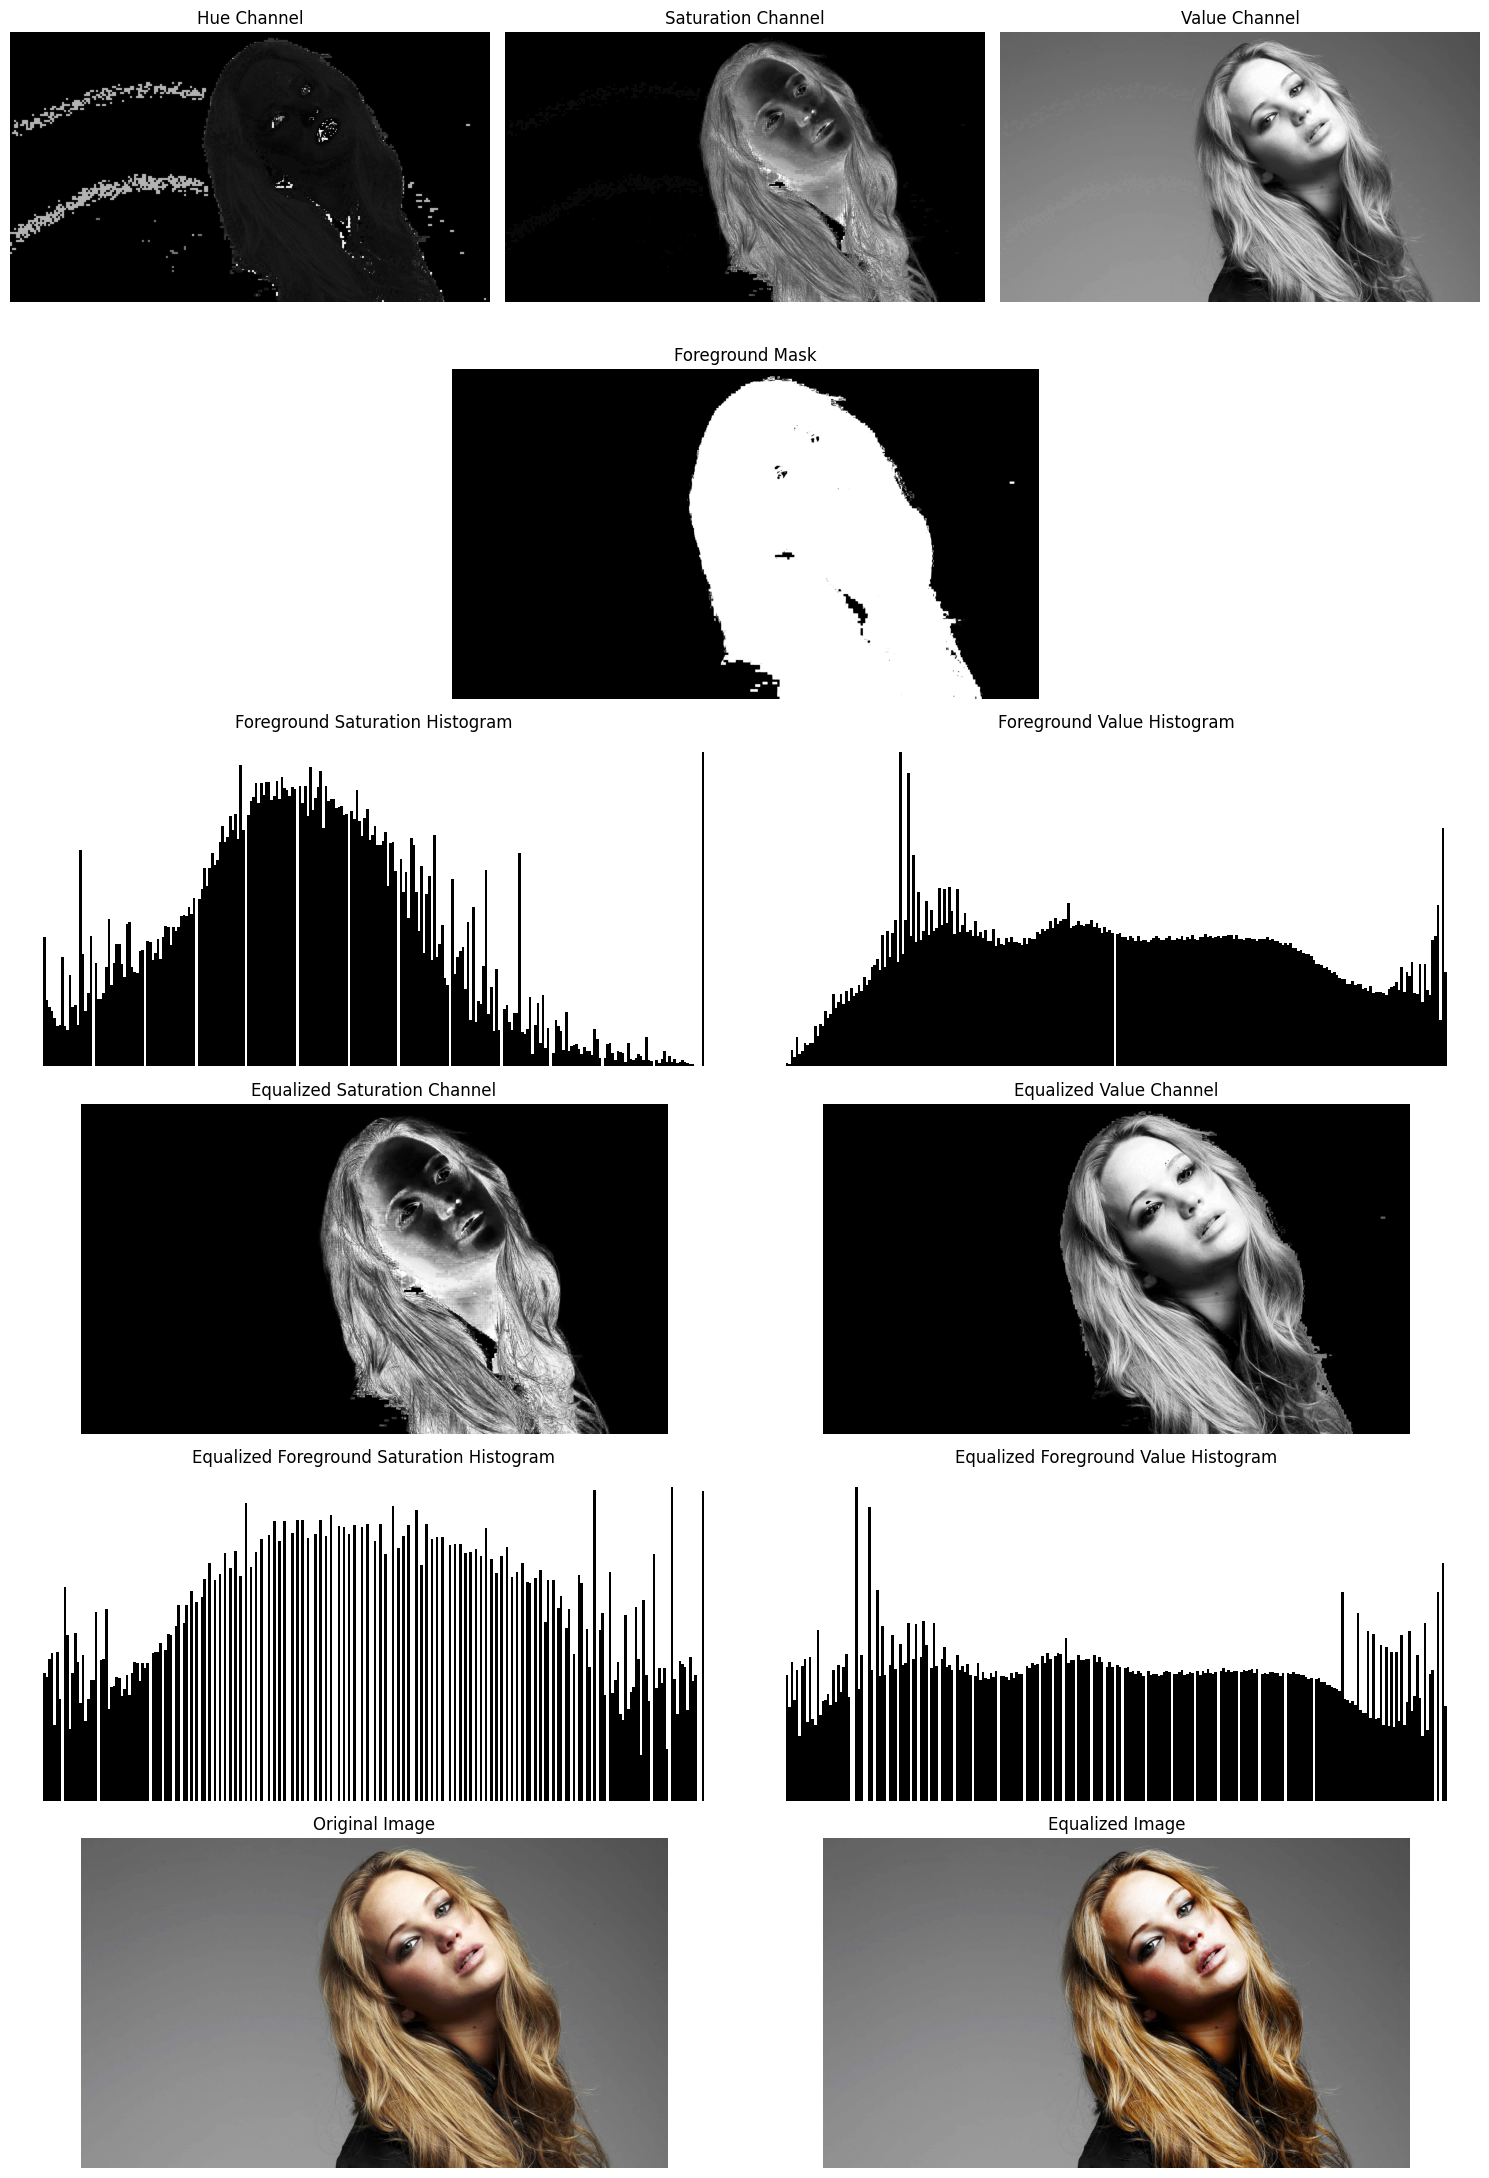

In [164]:
# Import GridSpec to better organize the plots
from matplotlib.gridspec import GridSpec

# Set up a 6 * 6 grid
fig = plt.figure(figsize=(15, 22))
gs = GridSpec(6, 6, figure=fig)

# Open the required image and convert to the HSV color space
img = cv2.imread("a1images/jeniffer.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Extract the H, S, V channels separately
H = img[:, :, 0]
S = img[:, :, 1]
V = img[:, :, 2]

# Display the H, S, V channels separately in grayscale
ax1 = fig.add_subplot(gs[0, 0:2])
ax1.axis('off')
ax1.set_title("Hue Channel")
ax1.imshow(H, cmap='gray', vmin=0, vmax=180)

ax2 = fig.add_subplot(gs[0, 2:4])
ax2.axis('off')
ax2.set_title("Saturation Channel")
ax2.imshow(S, cmap='gray', vmin=0, vmax=255)

ax3 = fig.add_subplot(gs[0, 4:6])
ax3.axis('off')
ax3.set_title("Value Channel")
ax3.imshow(V, cmap='gray', vmin=0, vmax=255)

# We apply a threshold in the S channel because the background is a significantly whiter shade than the rest of the image, and is denoted in the 
# S plane with significantly smaller values than the foreground
_, foreground_mask = cv2.threshold(S, 11, 255, cv2.THRESH_BINARY)
background_mask = cv2.bitwise_not(foreground_mask)

# Obtain the foreground and background separately from the S and V channels using cv2.bitwise_and
foreground_S = cv2.bitwise_and(S, foreground_mask)
foreground_V = cv2.bitwise_and(V, foreground_mask)

background_S = cv2.bitwise_and(S, background_mask)
background_V = cv2.bitwise_and(V, background_mask)

# Display the foreground mask, and the histograms of the foregrounds extracted from the S and V channels separately
ax4 = fig.add_subplot(gs[1, 1:5])
ax4.axis('off')
ax4.set_title("Foreground Mask")
ax4.imshow(foreground_mask, cmap='gray')   

# We leave out the intensity level 0 when plotting the histograms, as pixels of value 0 correspond to pixels in the background (by construction
# above), and we are only interested in the pixels in the foreground
ax5 = fig.add_subplot(gs[2, 0:3])
ax5.axis('off')
ax5.set_title("Foreground Saturation Histogram")
ax5.hist(foreground_S[foreground_S != 0].ravel(), bins=256, color='black')

ax6 = fig.add_subplot(gs[2, 3:6])
ax6.axis('off')
ax6.set_title("Foreground Value Histogram")
ax6.hist(foreground_V[foreground_V != 0].ravel(), bins=256, color='black')

# Define a function that uses np.cumsum and the formulas in the slides to equalize the histogram of an image
def equalize_histogram(img):
    pixel_values, counts = np.unique(img, return_counts=True)
    cumulative_counts = np.cumsum(counts)

    T = np.arange(256, dtype=np.uint8)

    for i in range(1, len(pixel_values)):
        pixel_value = pixel_values[i]
        # We make a slight modification to ignore the count of the 0 pixels, as these correspond to the background; simply subtract the
        # number of 0 pixels, i.e., cumulative_counts[0], from each quantity being considered
        T[pixel_value] = np.round(((cumulative_counts[i] - cumulative_counts[0]) / (cumulative_counts[-1] - cumulative_counts[0]) ) * 255)

    return T[img]

# Use the above function to equalize the histogram of both the S and V channels
foreground_S_eq = equalize_histogram(foreground_S)
foreground_V_eq = equalize_histogram(foreground_V)

# Display the equalized versions of the S and V channels in grayscale, and their new histograms
ax7 = fig.add_subplot(gs[3, 0:3])
ax7.axis('off')
ax7.set_title("Equalized Saturation Channel")
ax7.imshow(foreground_S_eq, cmap='gray', vmin=0, vmax=255)

ax8 = fig.add_subplot(gs[3, 3:6])
ax8.axis('off')
ax8.set_title("Equalized Value Channel")
ax8.imshow(foreground_V_eq, cmap='gray', vmin=0, vmax=255)

ax9 = fig.add_subplot(gs[4, 0:3])
ax9.axis('off')
ax9.set_title("Equalized Foreground Saturation Histogram")
ax9.hist(foreground_S_eq[foreground_S_eq != 0].ravel(), bins=256, color='black')

ax10 = fig.add_subplot(gs[4, 3:6])
ax10.axis('off')
ax10.set_title("Equalized Foreground Value Histogram")
ax10.hist(foreground_V_eq[foreground_V_eq != 0].ravel(), bins=256, color='black')

# Form new S and V channels by adding the equalized foregrounds with the original backgrounds
equalized_S = background_S + foreground_S_eq
equalized_V = background_V + foreground_V_eq

# Combine all channels to form a foreground-equalized image
equalized_img = cv2.merge((H, equalized_S, equalized_V))

# Display the original image against the foreground-equalized image
ax11 = fig.add_subplot(gs[5, 0:3])
ax11.axis('off')
ax11.set_title("Original Image")
ax11.imshow(cv2.cvtColor(img, cv2.COLOR_HSV2RGB))

ax12 = fig.add_subplot(gs[5, 3:6])
ax12.axis('off')
ax12.set_title("Equalized Image")
ax12.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_HSV2RGB))

plt.tight_layout()
plt.show()

##### Question 07

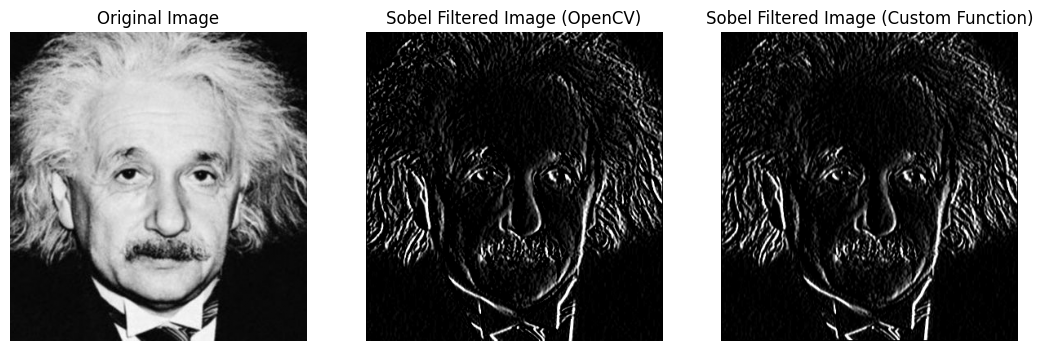

In [8]:
img = cv2.imread("a1images/einstein.png", cv2.IMREAD_GRAYSCALE)

sobel_filter = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
])

img_sobel_1 = cv2.filter2D(img, -1, sobel_filter)

def my_filter2D(img, kernel):
    padding_y = kernel.shape[0] // 2
    padding_x = kernel.shape[1] // 2

    new_img = np.zeros_like(img, dtype=np.uint8)
    
    for row_index in range(padding_y, img.shape[0] - padding_y):
        for col_index in range(padding_x, img.shape[1] - padding_x):
            new_value = 0
            for x in range(-padding_x, padding_x + 1):
                for y in range(-padding_y, padding_y + 1):
                    new_value += img[row_index + y][col_index + x] * kernel[y + padding_y][x + padding_x]
            new_img[row_index][col_index] = np.clip(new_value, 0, 255)

    return new_img

img_sobel_2 = my_filter2D(img, sobel_filter)

def my_filter1D(img, kernel):
    new_img = np.zeros_like(img, dtype=np.uint8)

    if kernel.shape[0] == 1:
        padding_x = kernel.shape[1] // 2
        for row_index in range(img.shape[0]):
            for col_index in range(padding_x, img.shape[1] - padding_x):
                new_value = 0
                for x in range(-padding_x, padding_x + 1):
                    new_value += img[row_index][col_index + x] * kernel[0][x + padding_x]
                new_img[row_index][col_index] = np.clip(new_value, 0, 255)
    elif kernel.shape[1] == 1:
        padding_y = kernel.shape[0] // 2
        for row_index in range(padding_y, img.shape[0] - padding_y):
            for col_index in range(img.shape[1]):
                new_value = 0
                for y in range(-padding_y, padding_y + 1):
                    new_value += img[row_index + y][col_index] * kernel[y + padding_y][0]
                new_img[row_index][col_index] = np.clip(new_value, 0, 255)
    
    return new_img

fig, ax = plt.subplots(1, 3, figsize=(13, 5))
for a in ax:
    a.axis('off')

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Sobel Filtered Image (OpenCV)")
ax[1].imshow(img_sobel_1, cmap='gray', vmin=0, vmax=255)

row = np.array([[1, 0, -1]])
col = np.array([[1], [2], [1]])
row_correlated = my_filter1D(img, row)
col_correlated = my_filter1D(row_correlated, col)

ax[2].set_title("Sobel Filtered Image (Custom Function)")
ax[2].imshow(col_correlated, cmap='gray', vmin=0, vmax=255)

plt.show()

##### Question 08

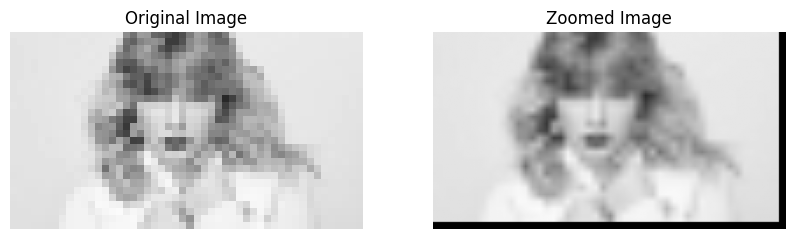

In [19]:
img = cv2.imread("a1images/a1q5images/taylor_very_small.jpg", cv2.IMREAD_GRAYSCALE)

def nearest_neighbor_zoom(img, scale):
    L = np.zeros((img.shape[0] * scale, img.shape[0]), dtype=np.float16)
    R = np.zeros((img.shape[1], img.shape[1] * scale), dtype=np.float16)
    
    if scale % 2 == 1:
        for i in range(img.shape[0] - 1):
            for j in range(scale):
                L[scale * i + j][i] = (j <= (scale // 2))
                L[scale * i + j][i + 1] = (j > (scale // 2))
        for j in range(scale):
            L[scale * i + j][i] = (j <= (scale // 2))
            L[scale * i + j][i + 1] = (j > (scale // 2))
        
        for i in range(img.shape[1] - 1):
            for j in range(scale):
                R[i][scale * i + j] = (j <= (scale // 2))
                R[i + 1][scale * i + j] = (j > (scale // 2))
        for j in range(scale):
            R[i][scale * i + j] = (j <= (scale // 2))
            R[i + 1][scale * i + j] = (j > (scale // 2))
    else:
        for i in range(img.shape[0] - 1):
            for j in range(scale):
                L[scale * i + j][i] = (j < (scale // 2)) + (j == (scale // 2)) * 0.5
                L[scale * i + j][i + 1] = (j > (scale // 2)) + (j == (scale // 2)) * 0.5
        for j in range(scale):
            L[scale * i + j][i] = (j < (scale // 2)) + (j == (scale // 2)) * 0.5
            L[scale * i + j][i + 1] = (j > (scale // 2)) + (j == (scale // 2)) * 0.5
        
        for i in range(img.shape[1] - 1):
            for j in range(scale):
                R[i][scale * i + j] = (j < (scale // 2)) + (j == (scale // 2)) * 0.5
                R[i + 1][scale * i + j] = (j > (scale // 2)) + (j == (scale // 2)) * 0.5
        for j in range(scale):
            R[i][scale * i + j] = (j < (scale // 2)) + (j == (scale // 2)) * 0.5
            R[i + 1][scale * i + j] = (j > (scale // 2)) + (j == (scale // 2)) * 0.5
            
    new_img = L @ img @ R
    return new_img

def bilinear_interpolation_zoom(img, scale):
    L = np.zeros((img.shape[0] * scale, img.shape[0]), dtype=np.float16)
    R = np.zeros((img.shape[1], img.shape[1] * scale), dtype=np.float16)
    
    for i in range(img.shape[0] - 1):
        for j in range(scale):
            L[scale * i + j][i] = 1 - (j / scale)
            L[scale * i + j][i + 1] = j / scale
    for j in range(scale):
        L[scale * i + j][i] = 1 - (j / scale)
        L[scale * i + j][i + 1] = j / scale

    for i in range(img.shape[1] - 1):
        for j in range(scale):
            R[i][scale * i + j] = 1 - (j / scale)
            R[i + 1][scale * i + j] = j / scale
    for j in range(scale):
        R[i][scale * i + j] = 1 - (j / scale)
        R[i + 1][scale * i + j] = j / scale
            
    new_img = L @ img @ R
    return new_img

zoomed = nearest_neighbor_zoom(img, 4)
zoomed2 = bilinear_interpolation_zoom(img, 4)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for a in ax:
    a.axis('off')

ax[0].set_title("Original Image")
ax[0].imshow(img, cmap='gray', vmin=0, vmax=255)

ax[1].set_title("Zoomed Image")
ax[1].imshow(zoomed2, cmap='gray', vmin=0, vmax=255)

cv2.imshow("Zoomed Image", zoomed.astype(np.uint8))
cv2.imshow("Original Image", img)
cv2.imshow("Bilinear ZOOM", zoomed2.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()

# plt.show()

##### Question 09

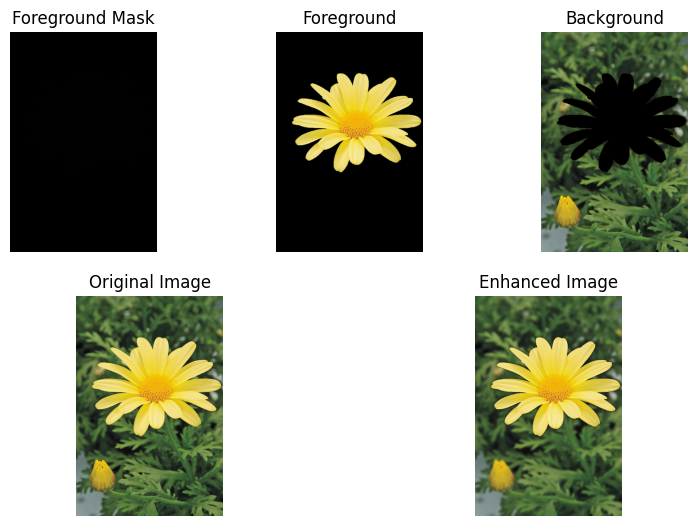

In [ ]:
img = cv2.imread("a1images/daisy.jpg")
mask = np.zeros(img.shape[:2], np.uint8)

from matplotlib.gridspec import GridSpec

rect = (35, 133, 521, 424)

bg_model = np.zeros((1, 65), np.float64)
fg_model = np.zeros((1, 65), np.float64)

cv2.grabCut(img, mask, rect, bg_model, fg_model, 5, cv2.GC_INIT_WITH_RECT)

fg_mask = (mask % 2)
bg_mask = 1 - fg_mask

foreground = img * fg_mask[:, :, np.newaxis]
background = img * bg_mask[:, :, np.newaxis]

fig = plt.figure(figsize=(10, 20))
gs = GridSpec(6, 6, figure=fig)

ax1 = fig.add_subplot(gs[0, 0:2])
ax1.axis('off')
ax1.set_title("Foreground Mask")
ax1.imshow(fg_mask, cmap='gray', vmin=0, vmax=255)

ax2 = fig.add_subplot(gs[0, 2:4])
ax2.axis('off')
ax2.set_title("Foreground")
ax2.imshow(cv2.cvtColor(foreground, cv2.COLOR_BGR2RGB))

ax3 = fig.add_subplot(gs[0, 4:6])
ax3.axis('off')
ax3.set_title("Background")
ax3.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))

blurred_background = cv2.GaussianBlur(background, (15, 15), 3)
blurred_background_masked = blurred_background * bg_mask[:, :, np.newaxis]
enhanced_img = blurred_background_masked + foreground

ax4 = fig.add_subplot(gs[1, 0:3])
ax4.axis('off')
ax4.set_title("Original Image")
ax4.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

ax5 = fig.add_subplot(gs[1, 3:6])
ax5.axis('off')
ax5.set_title("Enhanced Image")
ax5.imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))

plt.show()